このノートでは、コンペティション向けに与えられたデータセットについて、データを詳しく調べてみよう。

# 目標

このデータセットには、メルセデスベンツについての匿名化されたデータが含まれている。実証テストの結果についてはyとラベル付けされ、各車両が基準をクリアするまでに要した時間が秒単位で記録されている。

それでは、必要なモジュールをインストールしよう。

In [11]:
import numpy as np    #linear algebra
import pandas as pd   #data processing, CSV file I/0 (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import xgboost as xgb
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  #default="warn"
pd.options.display.max_columns=999

from subprocess import check_output
print(check_output("ls").decode("utf8"))


EDA-3-mercedes.ipynb
kernel.ipynb
sample_submission.csv
sample_submission.csv.zip
test.csv
test.csv.zip
train.csv
train.csv.zip



In [12]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
print("Train shape:",train_df.shape)
print("Test shape:",test_df.shape)


Train shape: (4209, 378)
Test shape: (4209, 377)


おっと。行の数は388の列の数に対しては少ないようだ。過学習しないようにしなければいけないな。

最初のいくつかの行をみてみよう。

In [13]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

# 目的変数

我々が予測する必要があるのはyである。この変数について、いくつか分析をしてみよう。

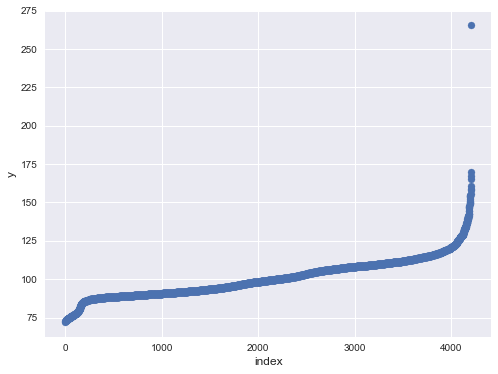

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]),np.sort(train_df.y.values))

plt.xlabel("index",fontsize=12)
plt.ylabel("y",fontsize=12)
plt.show()

# plt.figure(figsize=(8,6))
# plt.scatter(range(train_df.shape[0]), np.sort(train_df.y.values))
# plt.xlabel('index', fontsize=12)
# plt.ylabel('y', fontsize=12)
# plt.show()

データが一つだけ、他のデータの延長線上にあるようにみえる。

分布をプロットしてみよう。

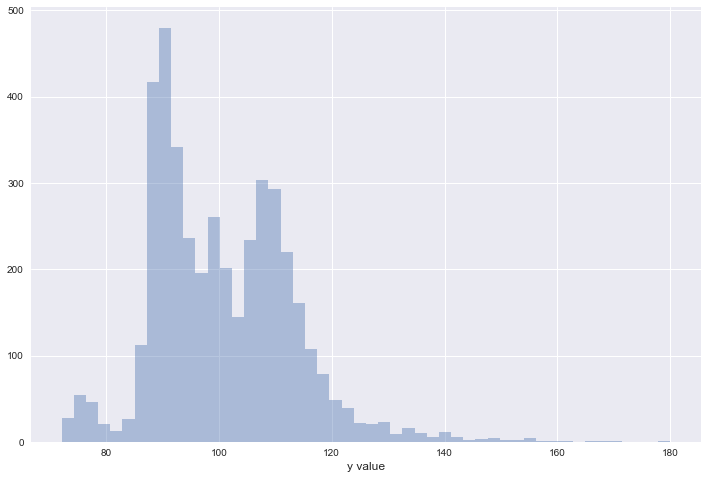

In [15]:
ulimit=180
train_df["y"].ix[train_df["y"]>ulimit]=ulimit         
#  yの値に関して、180より大きい値に関しては上限を打ち切りたいので、
#  ixメソッドで　train_df["y"]>ulimit　=180 の部分を抽出し、180より大きい値に関しては180に丸めている。


plt.figure(figsize=(12,8))
sns.distplot(train_df.y.values,bins=50,kde=False)
#  各yに対してそれに該当するデータが何件あるかの分布を表示。
#  オプションについて
#  binはx軸の刻み幅、kdeは密度近似関数を重ねて描画するかどうか。デフォルトはTrue


plt.xlabel("y value",fontsize=12)
plt.show()

それでは、データセットに含まれる変数のデータ型を確認してみよう。

In [16]:
dtype_df=train_df.dtypes.reset_index()
#  DataFrameはカラム毎にデータ型をもっているので、.dtypeでカラムんデータ型を取得。DataFrameで返す。

dtype_df.columns=["Count","Column Type"]
#  デフォルトのまま(1行目だけ)だと、カラムになにも名前がついていなくて、鉄骨むき出しなので、
#  dtype_df.column とか実行すると、['index', 0]　が返されてしまう。これでは不親切なので、それぞれ"Count"と"Column Type"と名前をつけている。

dtype_df.groupby("Column Type").aggregate("count").reset_index()
#  "Column Type"でグループわけして、グループ分けしたそれぞれに対して"count"カラムにあるデータの個数を集計している。
#　　例のごとく、reset_index() でDataFrameは作り直し

dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()  

,Column Type,Count
0,int64,369
1,float64,1
2,object,8


ほとんどのデータはカテゴリー変数からなる整数型のデータか、目的変数を表している浮動小数点数のデータ型である。

In [142]:
dtype_df.ix[:10,:]         # dtype_df はいまindex方向が、"Xi"になっているので、行方向は"X10"までスライス。列方向は"Count"も"Column Type"も抽出

,Count,Column Type
0,ID,int64
1,y,float64
2,X0,object
3,X1,object
4,X2,object
5,X3,object
6,X4,object
7,X5,object
8,X6,object
9,X8,object


X10からX8までがカテゴリー変数である。

# 欠損値

欠損値について調べよう。

In [26]:
missing_df = train_df.isnull().sum(axis=0).reset_index()          
#  カラム毎にnullデータがあるかどうかを調べてその合計値を返している。それをまた新しいDataFrameとして整形

missing_df.columns = ["column_name","missing_count"]
#  新しく作ったDataFrameに一応名前をつける。

missing_df=missing_df.ix[missing_df["missing_count"]>0]
# 欠損値が含んでいるカラムだけ抽出。

missing_df=missing_df.sort_values(by="missing_count")
#　そして(あれば)多い順にソート

missing_df



,column_name,missing_count


やった。欠損値のないデータセットだ！

# 整数型変数の分析

In [32]:
# 欠損値を調べてる

unique_values_dict = {}

for col in train_df.columns:
    if col not in ["ID","y","X0","X1","X2","X3","X4","X5","X6","X8"] : 
        unique_value = str(np.sort(test_df[col].unique()).tolist())
        tlist=unique_values_dict.get(unique_value,[])
        tlist.append(col)
        unique_values_dict[unique_value] = tlist[:]
        

for unique_val, columns in unique_values_dict.items():
    print("Columns containing the unique values:", unique_val)
    print(columns)
    print("-------------------------------------------------------------")


Columns containing the unique values: [0, 1]
['X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X

カラムは全て2値をとる変数で、特にいくつかの変数に関しては0にしかならないようだ。モデルを作る過程で、これらのカラムは取り除くことになるだろう。

それでは、このデータセットに存在するカテゴリー変数を調べてみよう。

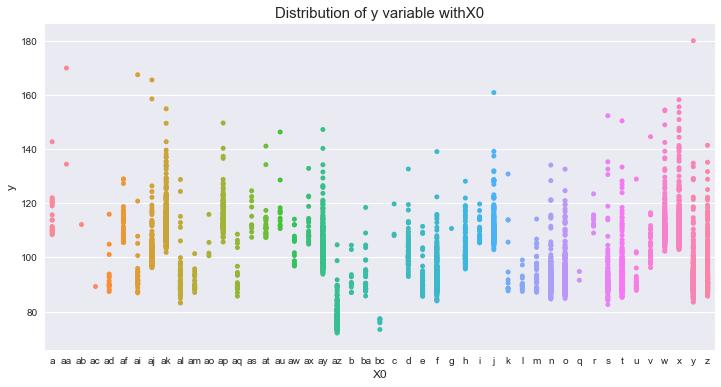

In [33]:
var_name="X0"
col_order=np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))

# "X0"カラムに含まれる、それぞれの要素がそれぞれどのくらいあるかの描画。
#  この行以下はグラフを書いているだけ。 
#  "X8"まで同様の処理。forでかけばいいのでは。。。？


sns.stripplot(x=var_name,y="y",data=train_df,order=col_order)
plt.xlabel(var_name,fontsize=12)
plt.ylabel("y",fontsize=12)
plt.title("Distribution of y variable with" + var_name,fontsize=15)
plt.show()


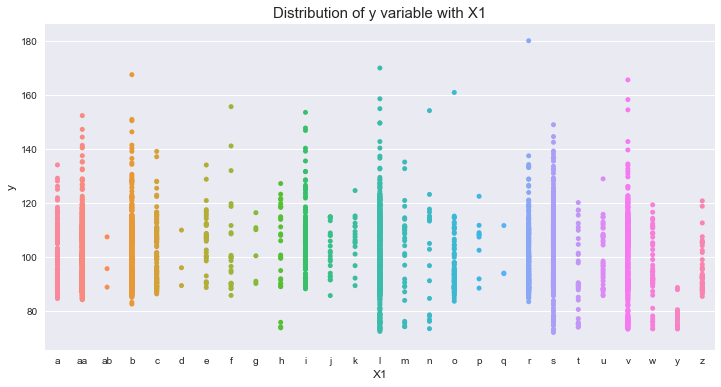

In [34]:
var_name = "X1"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

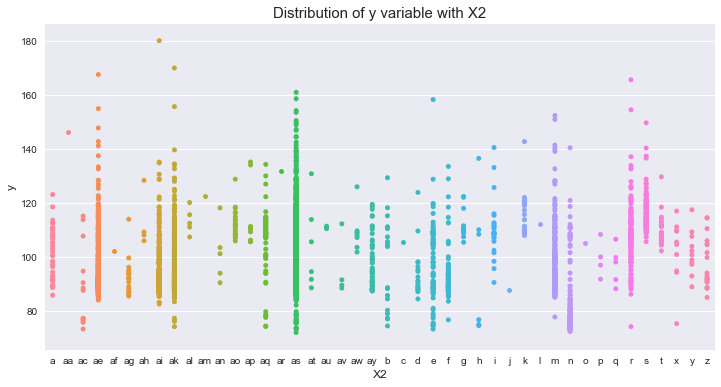

In [35]:
var_name = "X2"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

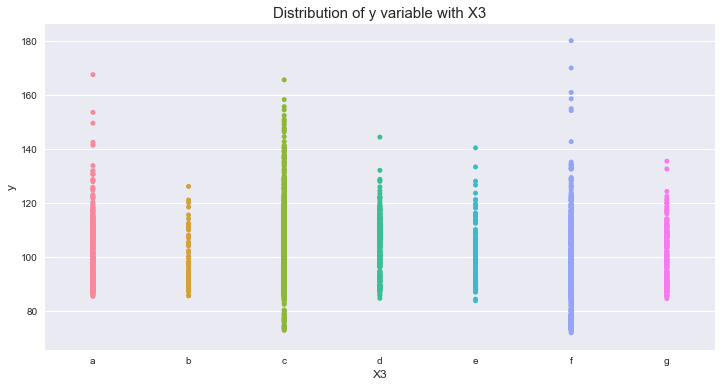

In [36]:
var_name = "X3"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

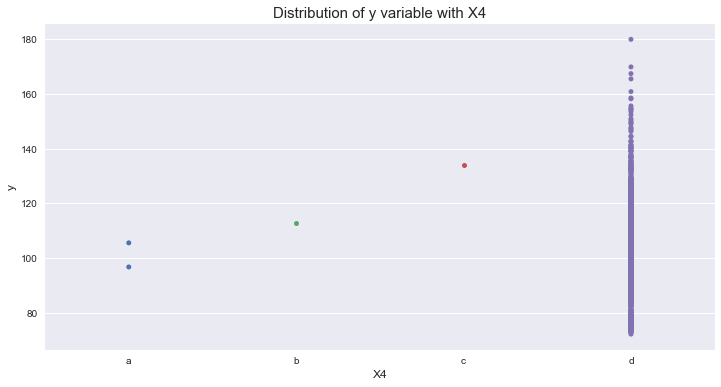

In [37]:
var_name = "X4"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

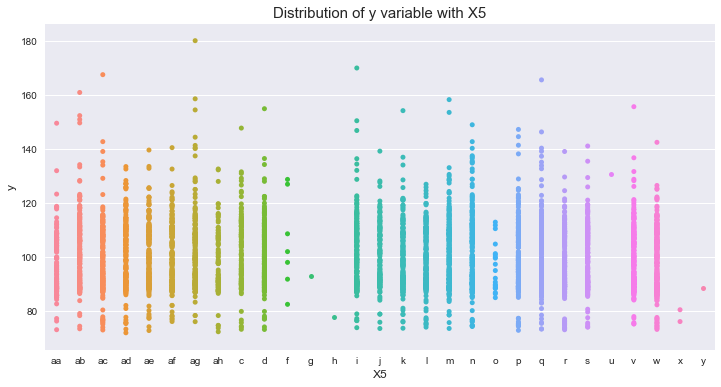

In [38]:
var_name = "X5"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

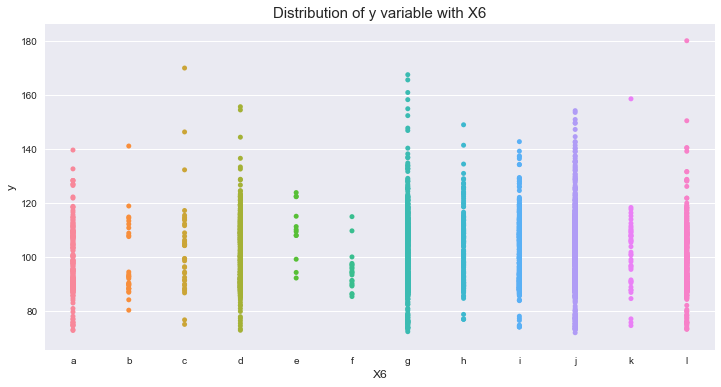

In [39]:
var_name = "X6"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

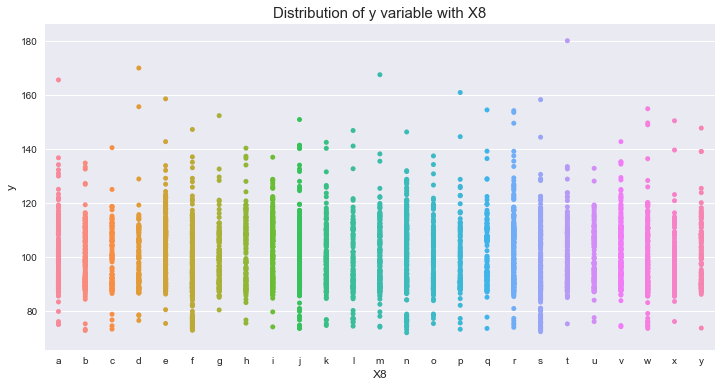

In [40]:
var_name = "X8"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

# 2値変数

さて、2値変数についてみていこう。すでにみたように、2値をとる変数が少なからずある。それぞれの変数について0と1を取り出してみよう！

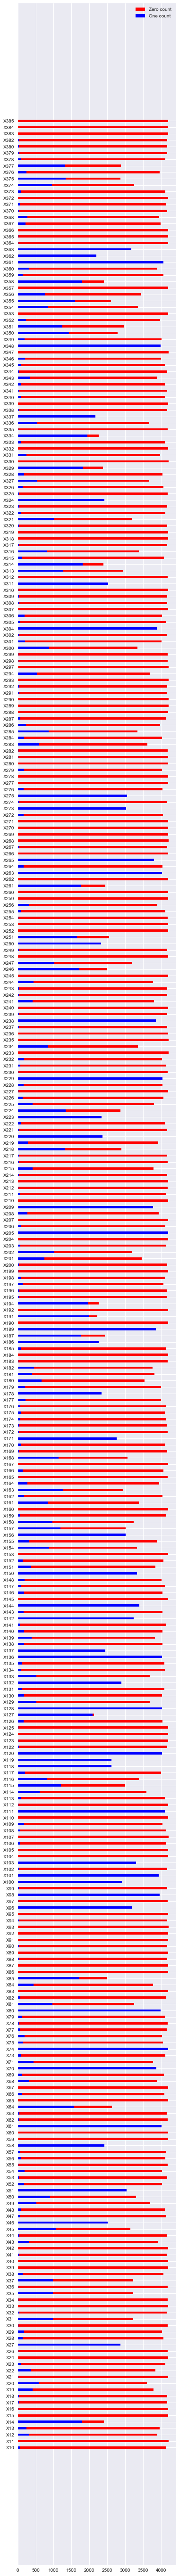

In [55]:
zero_count_list = []
one_count_list = []

cols_list = unique_values_dict['[0, 1]']

for col in cols_list:
    zero_count_list.append((train_df[col]==0).sum())    
    #  リスト内包表記、train_df[col]が0のところのタプルをかえして、合計してそれぞれのカラムに代入してる。
    
    one_count_list.append((train_df[col]==1).sum())    
    # 同様に、train_df[col]が1のところのタプルをかえして、合計してそれぞれのカラムに代入してる。
    
    

N = len(cols_list)
ind =np.arange(N)
width=0.35

plt.figure(figsize=(6,100))

p1 = plt.barh(ind,zero_count_list,width,color='red')　　　　　　#plt.barhの引数の詳しいとこはまだ調べられていない。。。
p2 = plt.barh(ind,one_count_list,width,color='blue')

plt.yticks(ind,cols_list)
plt.legend((p1[0],p2[0]),("Zero count", "One count"))
plt.show()



各2値変数ごとにyの平均を出してみよう。

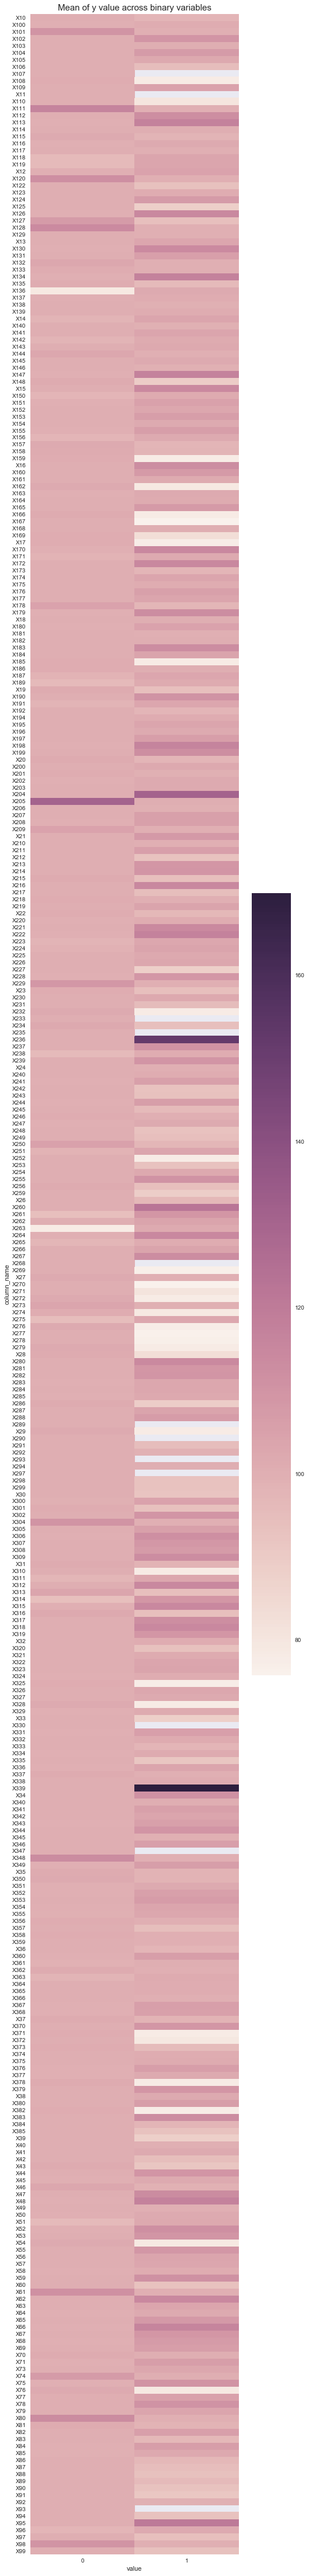

In [144]:
zero_mean_list = []
one_mean_list = []   
cols_list = unique_values_dict['[0, 1]']
for col in cols_list:
    zero_mean_list.append(train_df.ix[train_df[col]==0].y.mean())       
    #  train_df の　cols_list(=0か1しかとらないカラムのリスト)　の要素が0しか取らないカラムのyの平均。
    one_mean_list.append(train_df.ix[train_df[col]==1].y.mean())
    #  train_df の　cols_list(=0か1しかとらないカラムのリスト)　の要素が1しか取らないカラムのyの平均。


new_df = pd.DataFrame({"column_name":cols_list+cols_list, "value":[0]*len(cols_list) + [1]*len(cols_list), "y_mean":zero_mean_list+one_mean_list})
#  0をとるカラムを順番にならべてyの値も表示。

new_df = new_df.pivot('column_name', 'value', 'y_mean')      
#  行にカラムの名前、列に0か1をとって、それぞれのカラムの値0に対するyの平均、値1に対するyの平均をしめるように整形


plt.figure(figsize=(8,80))
sns.heatmap(new_df)
plt.title("Mean of y value across binary variables", fontsize=15)
plt.show()

(最初の文は訳せない。。。)　このノートの後半では、重要な変数に関してもっと詳しく見ていこうと思う。

#  ID変数

我々が確認する必要があるより重要な変数の一つがID変数である。これは、trainとtestがどのように分割されたのかという情報をもたらしてくれる。(ランダムなのか、IDベースなのか)。また、ID変数が予測可能な能力をもっているのかどうかを判断するのに役立つ。

それでは、変数yがID変数とともにどう変わって行くかみてみよう。

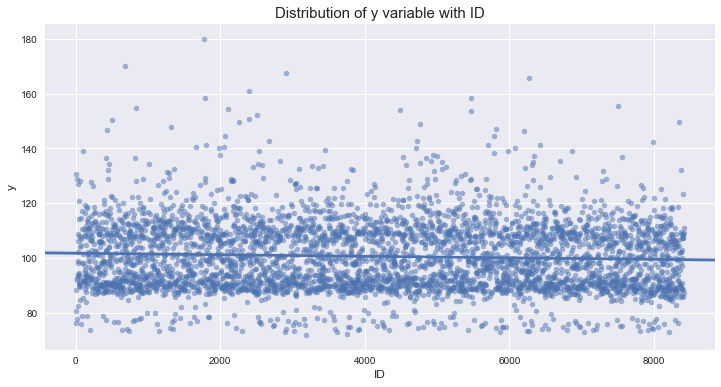

In [76]:

var_name = "ID"
plt.figure(figsize=(12,6))

sns.regplot(x=var_name,y="y",data=train_df,scatter_kws={"alpha":0.5,"s":30})
# x軸にIDをとって、y軸にyの値をとってプロット



plt.xlabel(var_name,fontsize=12)
plt.ylabel("y",fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()


# var_name = "ID"
# plt.figure(figsize=(12,6))
# sns.regplot(x=var_name, y='y', data=train_df, scatter_kws={'alpha':0.5, 's':30})
# plt.xlabel(var_name, fontsize=12)
# plt.ylabel('y', fontsize=12)
# plt.title("Distribution of y variable with "+var_name, fontsize=15)
# plt.show()

IDに関しては、わずかな減少傾向がみられるようだ。それでは、trainとtestについてIDがどのように分布しているのかみてみよう。

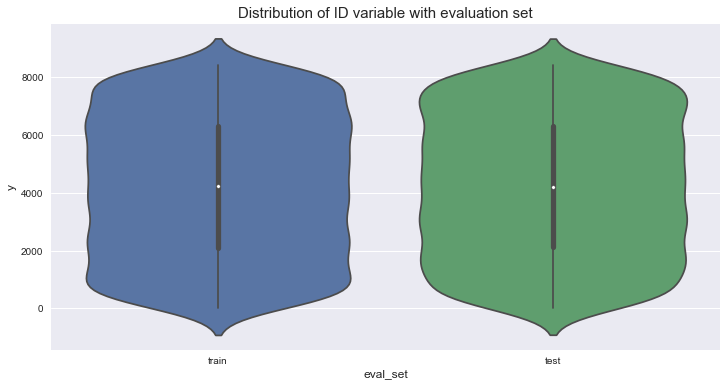

In [79]:
plt.figure(figsize=(6,10))
train_df["eval_set"]="train"
test_df["eval_set"]="test"
full_df=pd.concat([train_df[["ID","eval_set"]],test_df[["ID","eval_set"]]],axis=0)   #なにやってるのか不明。。。



plt.figure(figsize=(12,6))
sns.violinplot(x="eval_set",y="ID",data=full_df)
plt.xlabel("eval_set", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of ID variable with evaluation set", fontsize=15)
plt.show()




# plt.figure(figsize=(6,10))
# train_df['eval_set'] = "train"
# test_df['eval_set'] = "test"
# full_df = pd.concat([train_df[["ID","eval_set"]], test_df[["ID","eval_set"]]], axis=0)

# plt.figure(figsize=(12,6))
# sns.violinplot(x="eval_set", y='ID', data=full_df)
# plt.xlabel("eval_set", fontsize=12)
# plt.ylabel('y', fontsize=12)
# plt.title("Distribution of ID variable with evaluation set", fontsize=15)
# plt.show()

trainとtestについては、IDはランダムに分割されているようだ。

# 重要な変数

重要な変数を抽出するために、xgbboost モデルを実行してみよう。

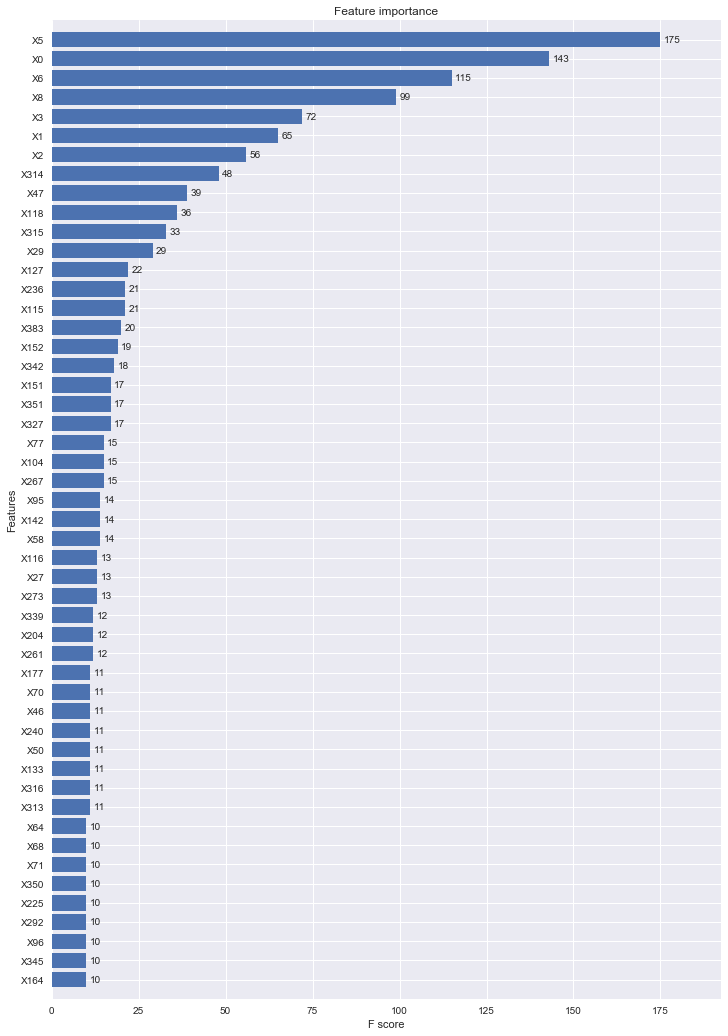

In [137]:
for f in ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        lbl = preprocessing.LabelEncoder()         
        # ここは関数を定義しているだけ。関数もオブジェクトなので、変数に代入できる。
        #  これ以後は、lbl() が preprocessing.LabelEncoder() のかわりになる。
        
        lbl.fit(list(train_df[f].values))    
        # 各カラム"Xi "について、それは文字列データなので、それをドメイン(定義域)と各要素の写像(map)される先を決める。
        
        
        train_df[f] = lbl.transform(list(train_df[f].values))
        # 一個前の処理でfitを使い、定義域と写像される先をきめたので、それに基づき、引数にとったlistを離散値に変換。
        
train_y = train_df['y'].values     #  train_df　のy のカラムのvalueだけ抽出し、array型としてtrain_y に代入。
train_X = train_df.drop(["ID", "y", "eval_set"], axis=1)      
#　同様に、もとのDataFrameのtrain_df から、ID と y と eval_set のカラムだけ除去し、新しいDataFrameとしてtrain_X に代入。


# # Thanks to anokas for this #
def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100, feval=xgb_r2_score, maximize=True)

# # plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()                   # このあたりなにやってるのか不明

カテゴリー変数は上位を占めている。

ランダムフォレストモデルを実装し、重要な変数をチェックしてみよう。

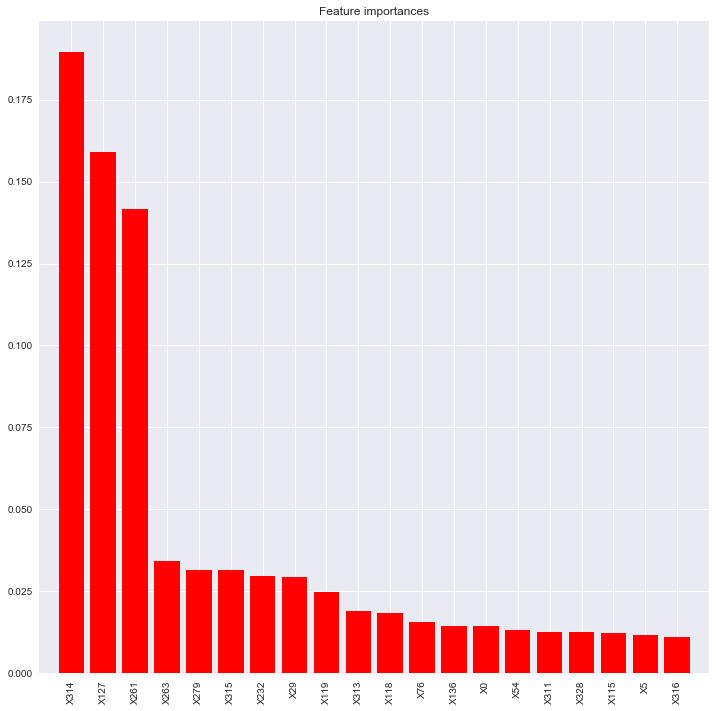

In [140]:
from sklearn import ensemble
model = ensemble.RandomForestRegressor(n_estimators=200, max_depth=10,min_samples_leaf=4,max_features=0.2,n_jobs=-1, random_state=0)

model.fit(train_X,train_y)
feat_names=train_X.columns.values


importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis = 0)
indices = np.argsort(importances)[::-1][:20]


plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()


#  この部分は、アンサンブル学習とか、ランダムフォレストとか結構難しい話になってしまうので、おいおい勉強します。。。。

重要変数について、xgboostとランダムフォレストとでは、少なからず違いがあるようだ。なぜかはわからないけども！